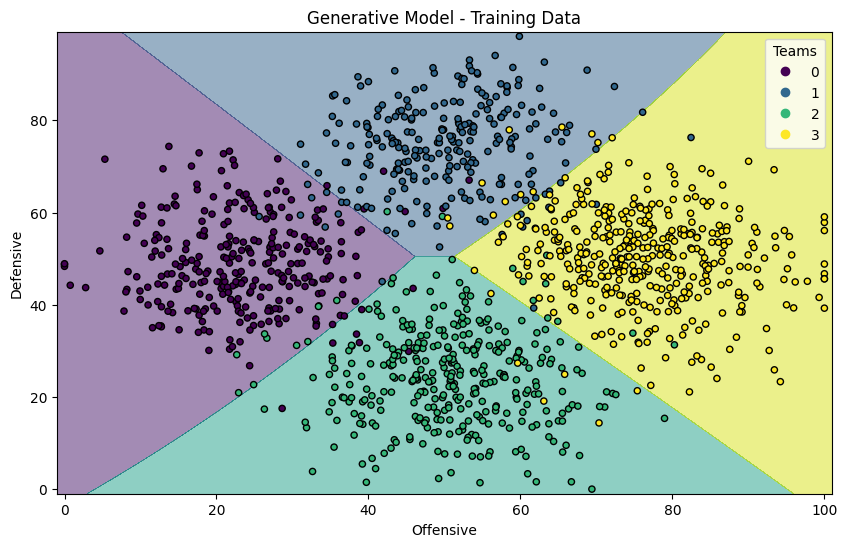

Generative Model - Training Data Accuracy: 0.943077
Training Data Confusion Matrix:
 [[287   6   7   0]
 [  9 228   0  13]
 [  9   2 330   9]
 [  0  12   7 381]]


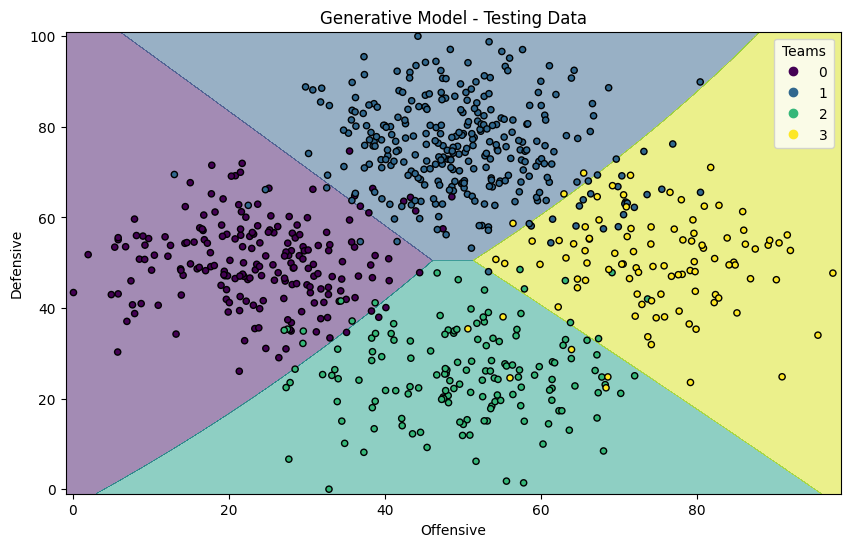

Generative Model - Testing Data Accuracy: 0.906667
Testing Data Confusion Matrix:
 [[185  10   5   0]
 [  6 268   1  25]
 [  7   0 136   7]
 [  0   3   6  91]]


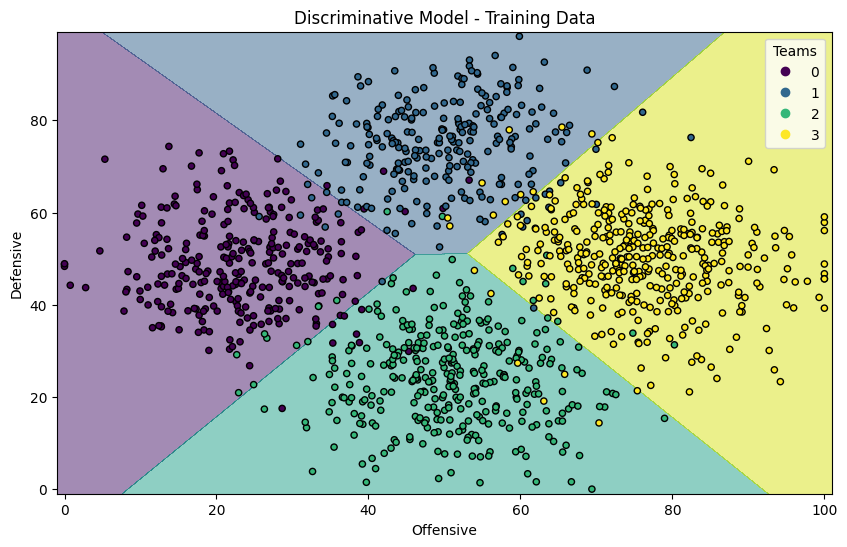

Discriminative Model - Training Data Accuracy: 0.942308
Training Data Confusion Matrix:
 [[285   6   9   0]
 [  9 226   1  14]
 [  9   2 331   8]
 [  0  10   7 383]]


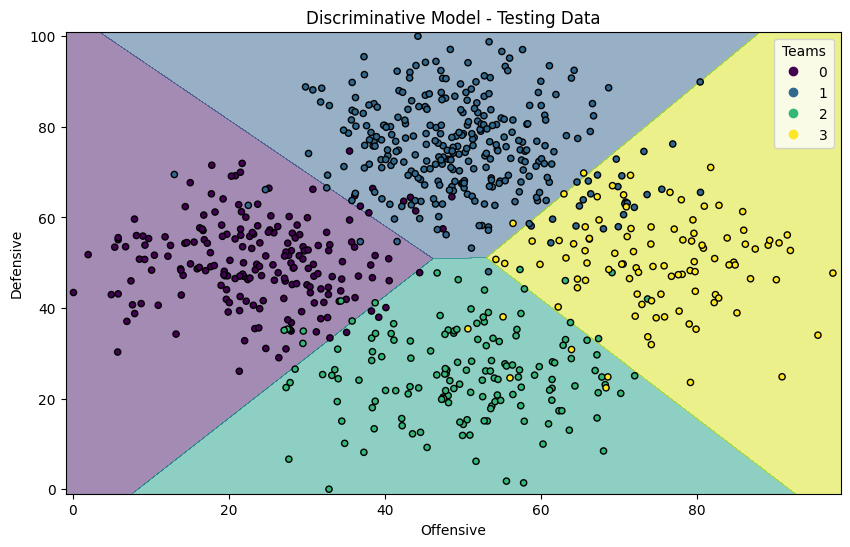

Discriminative Model - Testing Data Accuracy: 0.909333
Testing Data Confusion Matrix:
 [[185  10   5   0]
 [  6 267   1  26]
 [  7   0 138   5]
 [  0   2   6  92]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 加载数据
train_data = pd.read_csv('HW2_training.csv')
test_data = pd.read_csv('HW2_testing.csv')

# 提取特征和标签
X_train = train_data[['Offensive', 'Defensive']].values
y_train = train_data['Team'].values
X_test = test_data[['Offensive', 'Defensive']].values
y_test = test_data['Team'].values

# 创建生成模型
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_train_gnb = model_gnb.predict(X_train)
y_pred_test_gnb = model_gnb.predict(X_test)
train_accuracy_gnb = accuracy_score(y_train, y_pred_train_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_pred_test_gnb)
train_cm_gnb = confusion_matrix(y_train, y_pred_train_gnb)
test_cm_gnb = confusion_matrix(y_test, y_pred_test_gnb)

# 创建判别模型
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
train_cm_lr = confusion_matrix(y_train, y_pred_train_lr)
test_cm_lr = confusion_matrix(y_test, y_pred_test_lr)

# 绘制决策边界的函数，并标记不同的队伍
def plot_decision_boundary(model, X, y, dataset_type, model_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.legend(*scatter.legend_elements(), title="Teams")
    plt.title(f"{model_type} - {dataset_type}")
    plt.xlabel('Offensive')
    plt.ylabel('Defensive')
    plt.show()

# 绘制图像并打印准确率与混淆矩阵
plot_decision_boundary(model_gnb, X_train, y_train, "Training Data", "Generative Model")
print(f"Generative Model - Training Data Accuracy: {train_accuracy_gnb:.6f}")
print("Training Data Confusion Matrix:\n", train_cm_gnb)
plot_decision_boundary(model_gnb, X_test, y_test, "Testing Data", "Generative Model")
print(f"Generative Model - Testing Data Accuracy: {test_accuracy_gnb:.6f}")
print("Testing Data Confusion Matrix:\n", test_cm_gnb)

plot_decision_boundary(model_lr, X_train, y_train, "Training Data", "Discriminative Model")
print(f"Discriminative Model - Training Data Accuracy: {train_accuracy_lr:.6f}")
print("Training Data Confusion Matrix:\n", train_cm_lr)
plot_decision_boundary(model_lr, X_test, y_test, "Testing Data", "Discriminative Model")
print(f"Discriminative Model - Testing Data Accuracy: {test_accuracy_lr:.6f}")
print("Testing Data Confusion Matrix:\n", test_cm_lr)


Training Accuracy: 0.9453846153846154
Testing Accuracy: 0.9106666666666666
Training Confusion Matrix:
 [[228   1  21]
 [  2 333  15]
 [ 17  15 668]]
Testing Confusion Matrix:
 [[268   0  32]
 [  0 137  13]
 [ 12  10 278]]


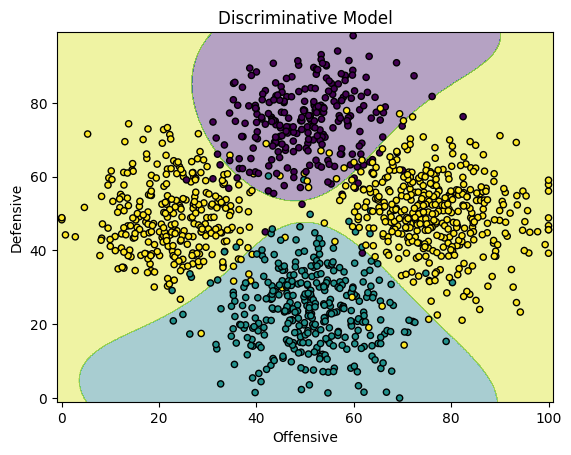

In [14]:
#svf方法


import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 加载数据
train_data = pd.read_csv('HW2_training.csv')
test_data = pd.read_csv('HW2_testing.csv')

# 数据预处理：修改队伍标签
train_data['Team'] = train_data['Team'].replace({0: 3})
test_data['Team'] = test_data['Team'].replace({0: 3})

# 提取特征和标签
X_train = train_data[['Offensive', 'Defensive']].values
y_train = train_data['Team'].values
X_test = test_data[['Offensive', 'Defensive']].values
y_test = test_data['Team'].values

# 训练非线性模型
model = SVC(kernel='rbf', gamma='scale', C=1.0)
model.fit(X_train, y_train)

# 预测和性能评估
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Testing Confusion Matrix:\n", test_conf_matrix)

# 绘制决策边界
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title('Discriminative Model')
    plt.xlabel('Offensive')
    plt.ylabel('Defensive')
    plt.show()

plot_decision_boundary(X_train, y_train, model)


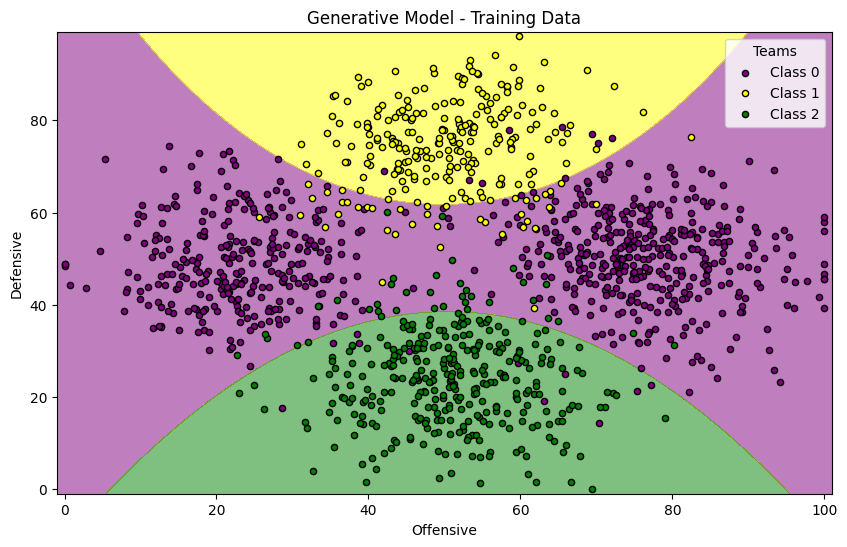

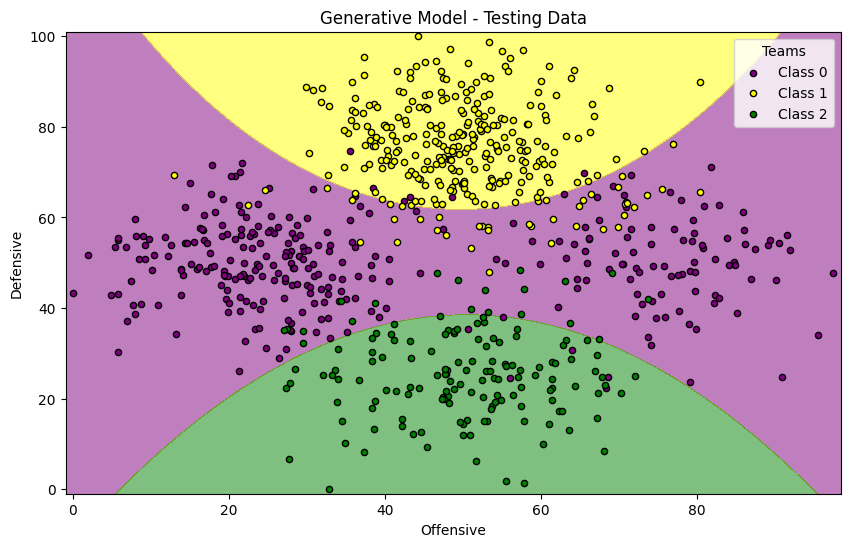

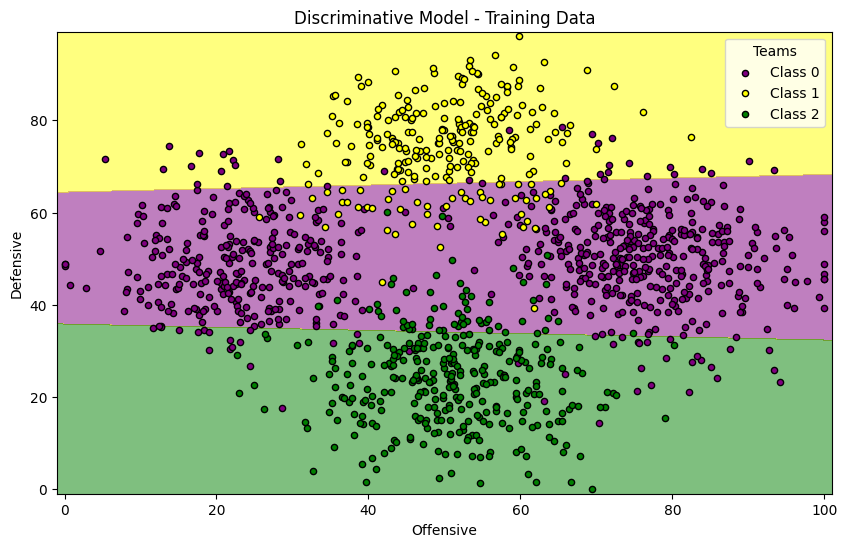

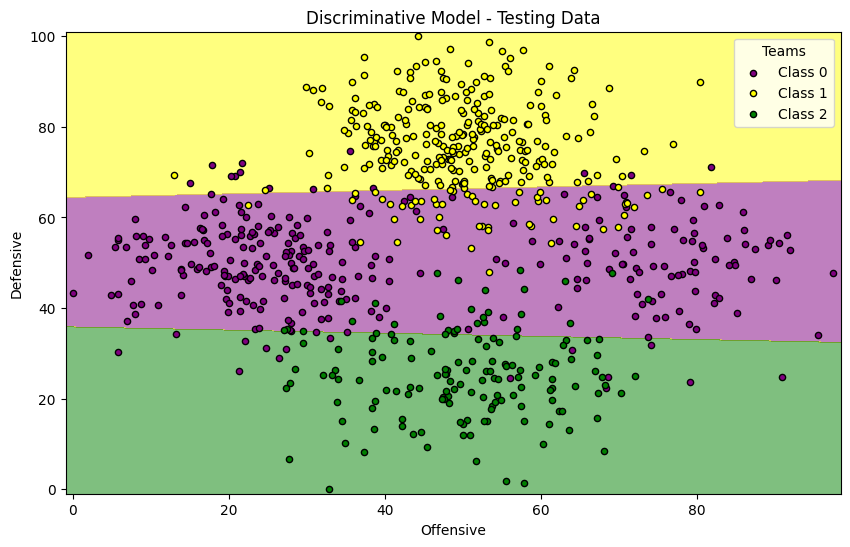

Generative Model - Training Data Accuracy: 0.924615
Generative Model - Training Data Confusion Matrix:
 [[680   9  11]
 [ 40 210   0]
 [ 38   0 312]]
Generative Model - Testing Data Accuracy: 0.897333
Generative Model - Testing Data Confusion Matrix:
 [[288   6   6]
 [ 44 256   0]
 [ 21   0 129]]
Discriminative Model - Training Data Accuracy: 0.853077
Discriminative Model - Training Data Confusion Matrix:
 [[622  35  43]
 [ 54 196   0]
 [ 59   0 291]]
Discriminative Model - Testing Data Accuracy: 0.842667
Discriminative Model - Testing Data Confusion Matrix:
 [[270  14  16]
 [ 58 242   0]
 [ 30   0 120]]


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 加载数据
train_data = pd.read_csv('HW2_training.csv')
test_data = pd.read_csv('HW2_testing.csv')

# 数据预处理：根据 Part II 的要求修改队伍标签
mapping = {0: 0, 3: 0, 1: 1, 2: 2}  # 将 Team 0 和 Team 3 归为类别 A (0)，Team 1 为类别 B (1)，Team 2 为类别 C (2)
train_data['Team'] = train_data['Team'].map(mapping)
test_data['Team'] = test_data['Team'].map(mapping)

# 提取特征和标签
X_train = train_data[['Offensive', 'Defensive']].values
y_train = train_data['Team'].values
X_test = test_data[['Offensive', 'Defensive']].values
y_test = test_data['Team'].values

# 创建生成模型和判别模型
model_gnb = GaussianNB()
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_gnb.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

# 创建颜色映射
team_colors = ['purple', 'yellow', 'green']  # 为类别 A, B, C 分别定义颜色
cmap_background = ListedColormap(team_colors)  # 创建背景颜色映射

# 绘制决策边界的函数，并为每个类别添加标签和颜色
def plot_decision_boundary(model, X, y, dataset_type, model_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, levels=np.arange(len(np.unique(y)) + 1) - 0.5, cmap=cmap_background)
    for i, color in enumerate(team_colors):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=f'Class {i}', edgecolor='k', s=20)
    plt.title(f"{model_type} - {dataset_type}")
    plt.xlabel('Offensive')
    plt.ylabel('Defensive')
    plt.legend(title="Teams")
    plt.show()

# 调用绘制函数
plot_decision_boundary(model_gnb, X_train, y_train, "Training Data", "Generative Model")
plot_decision_boundary(model_gnb, X_test, y_test, "Testing Data", "Generative Model")
plot_decision_boundary(model_lr, X_train, y_train, "Training Data", "Discriminative Model")
plot_decision_boundary(model_lr, X_test, y_test, "Testing Data", "Discriminative Model")

# 输出准确率和混淆矩阵
print(f"Generative Model - Training Data Accuracy: {train_accuracy_gnb:.6f}")
print("Generative Model - Training Data Confusion Matrix:\n", train_cm_gnb)
print(f"Generative Model - Testing Data Accuracy: {test_accuracy_gnb:.6f}")
print("Generative Model - Testing Data Confusion Matrix:\n", test_cm_gnb)
print(f"Discriminative Model - Training Data Accuracy: {train_accuracy_lr:.6f}")
print("Discriminative Model - Training Data Confusion Matrix:\n", train_cm_lr)
print(f"Discriminative Model - Testing Data Accuracy: {test_accuracy_lr:.6f}")
print("Discriminative Model - Testing Data Confusion Matrix:\n", test_cm_lr)


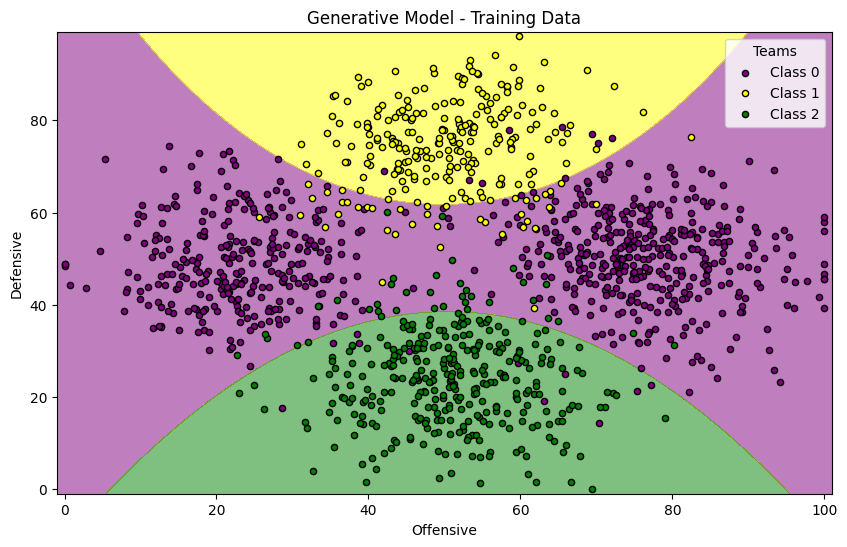

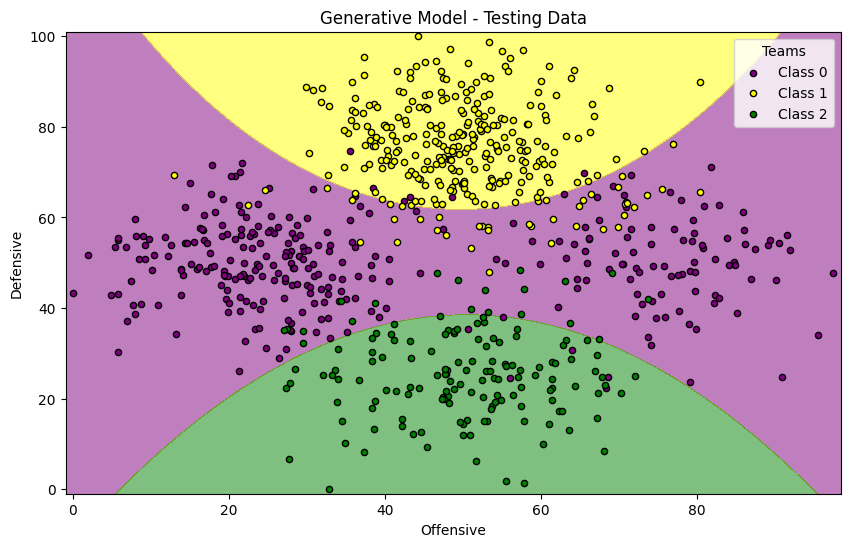

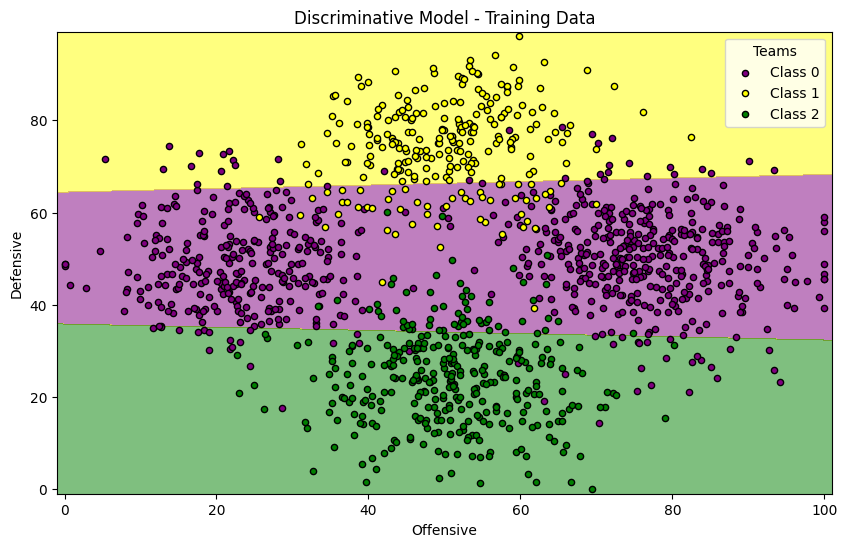

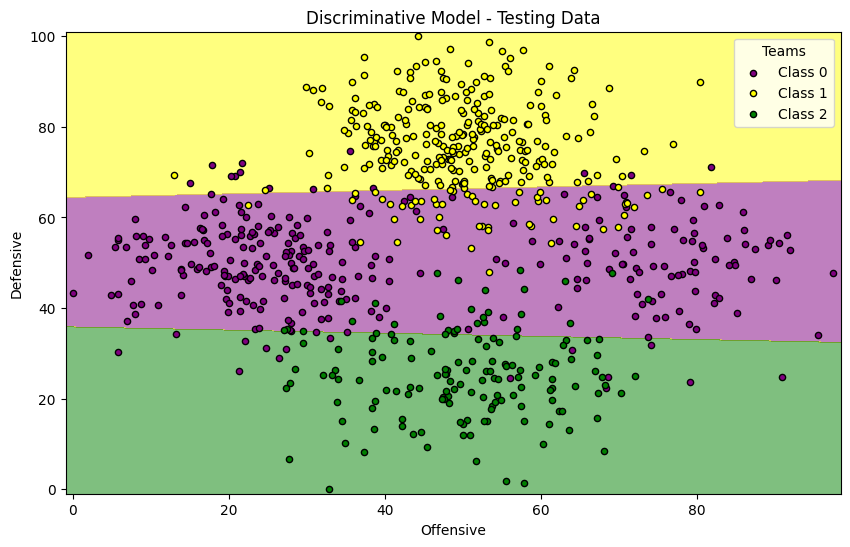

Generative Model - Training Data Accuracy: 0.924615
Generative Model - Training Data Confusion Matrix:
 [[680   9  11]
 [ 40 210   0]
 [ 38   0 312]]
Generative Model - Testing Data Accuracy: 0.897333
Generative Model - Testing Data Confusion Matrix:
 [[288   6   6]
 [ 44 256   0]
 [ 21   0 129]]
Discriminative Model - Training Data Accuracy: 0.853077
Discriminative Model - Training Data Confusion Matrix:
 [[622  35  43]
 [ 54 196   0]
 [ 59   0 291]]
Discriminative Model - Testing Data Accuracy: 0.842667
Discriminative Model - Testing Data Confusion Matrix:
 [[270  14  16]
 [ 58 242   0]
 [ 30   0 120]]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 加载数据
train_data = pd.read_csv('HW2_training.csv')
test_data = pd.read_csv('HW2_testing.csv')

# 数据预处理：根据 Part II 的要求修改队伍标签
mapping = {0: 0, 3: 0, 1: 1, 2: 2}  # 将 Team 0 和 Team 3 归为类别 A (0)，Team 1 为类别 B (1)，Team 2 为类别 C (2)
train_data['Team'] = train_data['Team'].map(mapping)
test_data['Team'] = test_data['Team'].map(mapping)

# 提取特征和标签
X_train = train_data[['Offensive', 'Defensive']].values
y_train = train_data['Team'].values
X_test = test_data[['Offensive', 'Defensive']].values
y_test = test_data['Team'].values

# 创建生成模型和判别模型
model_gnb = GaussianNB()
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_gnb.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

# 预测和计算准确率
y_pred_train_gnb = model_gnb.predict(X_train)
y_pred_test_gnb = model_gnb.predict(X_test)
train_accuracy_gnb = accuracy_score(y_train, y_pred_train_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_pred_test_gnb)
train_cm_gnb = confusion_matrix(y_train, y_pred_train_gnb)
test_cm_gnb = confusion_matrix(y_test, y_pred_test_gnb)

y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
train_cm_lr = confusion_matrix(y_train, y_pred_train_lr)
test_cm_lr = confusion_matrix(y_test, y_pred_test_lr)

# 创建颜色映射
team_colors = ['purple', 'yellow', 'green']  # 为类别 A, B, C 分别定义颜色
cmap_background = ListedColormap(team_colors)  # 创建背景颜色映射

# 绘制决策边界的函数，并为每个类别添加标签和颜色
def plot_decision_boundary(model, X, y, dataset_type, model_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, levels=np.arange(len(np.unique(y)) + 1) - 0.5, cmap=cmap_background)
    for i, color in enumerate(team_colors):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=f'Class {i}', edgecolor='k', s=20)
    plt.title(f"{model_type} - {dataset_type}")
    plt.xlabel('Offensive')
    plt.ylabel('Defensive')
    plt.legend(title="Teams")
    plt.show()

# 调用绘制函数
plot_decision_boundary(model_gnb, X_train, y_train, "Training Data", "Generative Model")
plot_decision_boundary(model_gnb, X_test, y_test, "Testing Data", "Generative Model")
plot_decision_boundary(model_lr, X_train, y_train, "Training Data", "Discriminative Model")
plot_decision_boundary(model_lr, X_test, y_test, "Testing Data", "Discriminative Model")

# 输出准确率和混淆矩阵
print(f"Generative Model - Training Data Accuracy: {train_accuracy_gnb:.6f}")
print("Generative Model - Training Data Confusion Matrix:\n", train_cm_gnb)
print(f"Generative Model - Testing Data Accuracy: {test_accuracy_gnb:.6f}")
print("Generative Model - Testing Data Confusion Matrix:\n", test_cm_gnb)

print(f"Discriminative Model - Training Data Accuracy: {train_accuracy_lr:.6f}")
print("Discriminative Model - Training Data Confusion Matrix:\n", train_cm_lr)
print(f"Discriminative Model - Testing Data Accuracy: {test_accuracy_lr:.6f}")
print("Discriminative Model - Testing Data Confusion Matrix:\n", test_cm_lr)


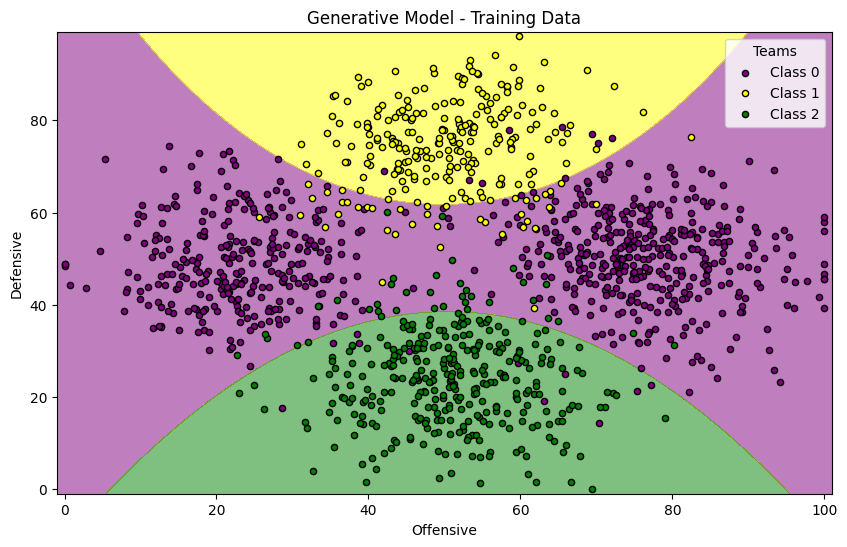

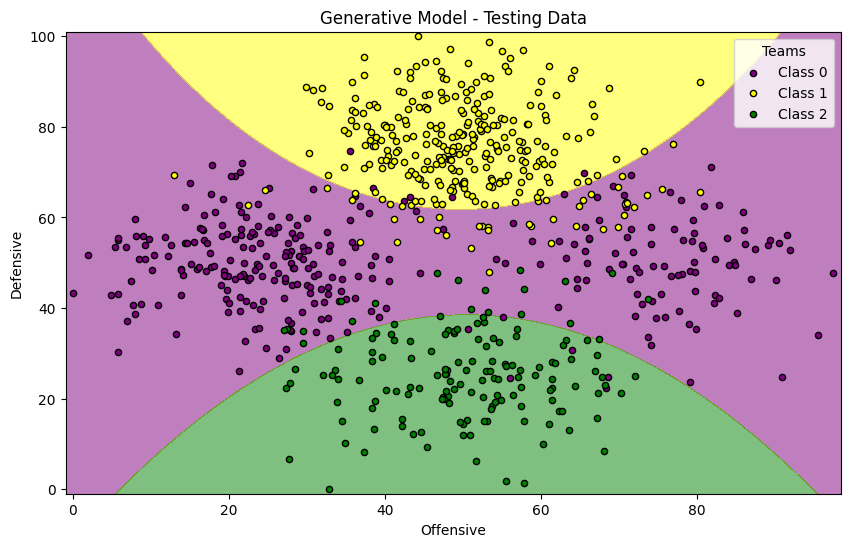

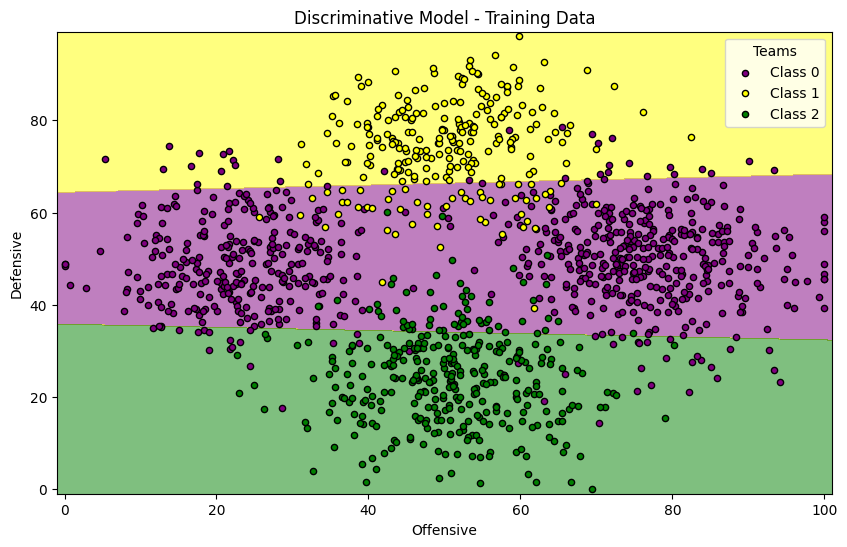

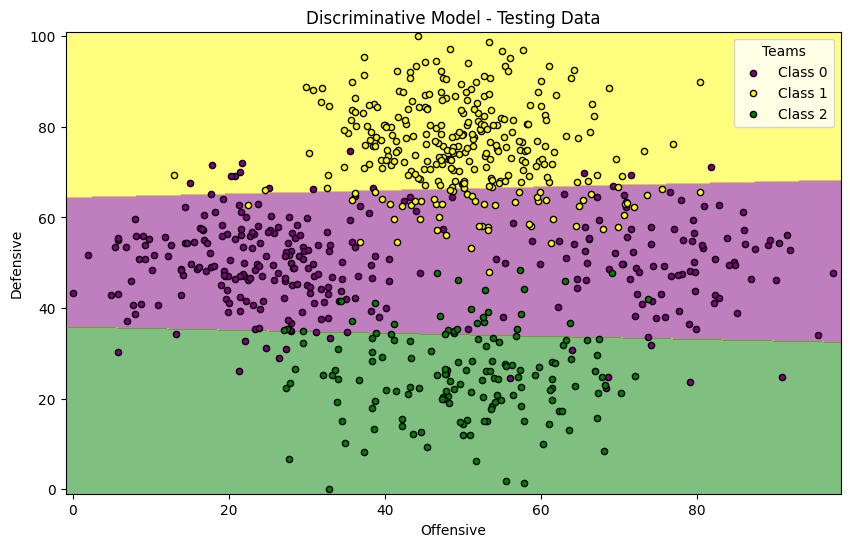

Generative Model - Training Data Accuracy: 0.924615
Generative Model - Testing Data Accuracy: 0.897333
Discriminative Model - Training Data Accuracy: 0.853077
Discriminative Model - Testing Data Accuracy: 0.844000
Generative Model - Training Data Confusion Matrix:
 [[680   9  11]
 [ 40 210   0]
 [ 38   0 312]]
Generative Model - Testing Data Confusion Matrix:
 [[288   6   6]
 [ 44 256   0]
 [ 21   0 129]]
Discriminative Model - Training Data Confusion Matrix:
 [[622  35  43]
 [ 54 196   0]
 [ 59   0 291]]
Discriminative Model - Testing Data Confusion Matrix:
 [[271  14  15]
 [ 58 242   0]
 [ 30   0 120]]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 加载数据
train_data = pd.read_csv('HW2_training.csv')
test_data = pd.read_csv('HW2_testing.csv')

# 数据预处理：根据 Part II 的要求修改队伍标签
mapping = {0: 0, 3: 0, 1: 1, 2: 2}  # 将 Team 0 和 Team 3 归为类别 A (0)，Team 1 为类别 B (1)，Team 2 为类别 C (2)
train_data['Team'] = train_data['Team'].map(mapping)
test_data['Team'] = test_data['Team'].map(mapping)

# 提取特征和标签
X_train = train_data[['Offensive', 'Defensive']].values
y_train = train_data['Team'].values
X_test = test_data[['Offensive', 'Defensive']].values
y_test = test_data['Team'].values

# 创建生成模型
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

# 创建判别模型
model_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)  # 使用newton-cg解算器进行逻辑回归
model_lr.fit(X_train, y_train)

# 创建颜色映射
team_colors = ['purple', 'yellow', 'green']  # 为类别 A, B, C 分别定义颜色
cmap_background = ListedColormap(team_colors)  # 创建背景颜色映射

# 绘制决策边界的函数，并为每个类别添加标签和颜色
def plot_decision_boundary(model, X, y, dataset_type, model_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, levels=np.arange(len(np.unique(y)) + 1) - 0.5, cmap=cmap_background)
    for i, color in enumerate(team_colors):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=f'Class {i}', edgecolor='k', s=20)
    plt.title(f"{model_type} - {dataset_type}")
    plt.xlabel('Offensive')
    plt.ylabel('Defensive')
    plt.legend(title="Teams")
    plt.show()

# 调用绘制函数
plot_decision_boundary(model_gnb, X_train, y_train, "Training Data", "Generative Model")
plot_decision_boundary(model_gnb, X_test, y_test, "Testing Data", "Generative Model")
plot_decision_boundary(model_lr, X_train, y_train, "Training Data", "Discriminative Model")
plot_decision_boundary(model_lr, X_test, y_test, "Testing Data", "Discriminative Model")

# 输出准确率和混淆矩阵
train_accuracy_gnb = accuracy_score(y_train, model_gnb.predict(X_train))
test_accuracy_gnb = accuracy_score(y_test, model_gnb.predict(X_test))
train_accuracy_lr = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy_lr = accuracy_score(y_test, model_lr.predict(X_test))

print(f"Generative Model - Training Data Accuracy: {train_accuracy_gnb:.6f}")
print(f"Generative Model - Testing Data Accuracy: {test_accuracy_gnb:.6f}")
print(f"Discriminative Model - Training Data Accuracy: {train_accuracy_lr:.6f}")
print(f"Discriminative Model - Testing Data Accuracy: {test_accuracy_lr:.6f}")

# 输出混淆矩阵
train_cm_gnb = confusion_matrix(y_train, model_gnb.predict(X_train))
test_cm_gnb = confusion_matrix(y_test, model_gnb.predict(X_test))
train_cm_lr = confusion_matrix(y_train, model_lr.predict(X_train))
test_cm_lr = confusion_matrix(y_test, model_lr.predict(X_test))

print("Generative Model - Training Data Confusion Matrix:\n", train_cm_gnb)
print("Generative Model - Testing Data Confusion Matrix:\n", test_cm_gnb)
print("Discriminative Model - Training Data Confusion Matrix:\n", train_cm_lr)
print("Discriminative Model - Testing Data Confusion Matrix:\n", test_cm_lr)
